## Training and analysis for Convolutional Neural Network (AlexNet)

### Configuration


#### Install the `PyHessian` library


In [1]:
!git clone https://github.com/amirgholami/PyHessian.git
import sys
sys.path.append('/content/PyHessian/')


Cloning into 'PyHessian'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 116 (delta 51), reused 58 (delta 18), pack-reused 0
Receiving objects: 100% (116/116), 2.10 MiB | 27.93 MiB/s, done.
Resolving deltas: 100% (51/51), done.


#### Import libraries

In [2]:
%matplotlib inline
import os
import subprocess
import itertools
import time
import torch

import numpy as np
import matplotlib.pyplot as plt

# folder to save
base_path = 'results_FC_scales'

if not os.path.exists(base_path):
    os.makedirs(base_path)


### Training the neural network

Run the following command to train the neural network, we just provide one example here. For training the different  network, one can just need to modify the parameters in the command. 


- --save_dir: the fold to save the result
- --width, --depth : width and depth of the CNN
- --dataset: cifar10 or mnist
- --model: in this experiment, we use AlexNet
- --iterations: we train for 25,0000 steps
- --eval_freq: the frequnce of record the results 
- --close_check_lb , --close_check_hb ,--close_check_freq: this is for fine-grained analysis. For example, if one need to record the result for every 10 step in 300-400 steps, one can set --close_check_lb 300, --close_check_hb 400,--close_check_freq 10
- --eval_Hessian_freq: the frequence of the calculate the Hessian.

#### Generate first the command.

In [5]:

w = 32        # width of the network: 8, 16 or 32
dep = 2       # depth of the network: only a placeholder, not useful for AlexNet
s = 0         # seed
l = 'NLL'     # loss: NLL is short for negative log likelihood
d = 'cifar10' # dataset
m = 'alexnet' # network

iter = 25000  # maximum number of iterations we will run
eval_freq = 100           # Once every #iterations we evaluate the performance
eval_Hessian_freq = 5000  # Once every #iterations we check the Hessian


save_dir = base_path + '/{}_{:04d}_{:02d}_{}_{}_{}'.format(dep, w, s, d, l, m)
if os.path.exists(save_dir):
    print('folder already exists, quitting')

cmd = 'python main.py '
cmd += '--save_dir {} '.format(save_dir)
if m == 'fc':
  cmd += '--width {} '.format(w)
elif m == 'alexnet':
  cmd += '--scale {} '.format(w)
cmd += '--depth {} '.format(dep)
cmd += '--seed {} '.format(s)
cmd += '--dataset {} '.format(d)
cmd += '--model {} '.format(m)
cmd += '--lr {} '.format('0.1')
cmd += '--lr_schedule '
cmd += '--iterations {} '.format(iter)
cmd += '--eval_freq {} '.format(eval_freq)
cmd += '--eval_Hessian_freq {} '.format(eval_Hessian_freq)

f = open(save_dir + '.log', 'w')

print(cmd)
   

python main.py --save_dir results_FC_scales/2_0032_00_cifar10_NLL_alexnet --scale 32 --depth 2 --seed 0 --dataset cifar10 --model alexnet --lr 0.1 --lr_schedule --iterations 25000 --eval_freq 100 --eval_Hessian_freq 5000 


#### Run the command and trian the model.

In [ ]:
!python main.py --save_dir results_FC_scales/2_0032_00_cifar10_NLL_alexnet --scale 32 --depth 2 --seed 0 --dataset cifar10 --model alexnet --lr 0.1 --lr_schedule --iterations 25000 --eval_freq 100 --close_check_lb 0 --close_check_hb 0 --close_check_freq 10 --eval_Hessian_freq 5000 


Namespace(batch_size_eval=100, batch_size_train=100, close_check_freq=10, close_check_hb=0, close_check_lb=0, criterion='NLL', dataset='cifar10', depth=2, device=device(type='cpu'), double=False, eval_Hessian_freq=5000, eval_freq=100, iterations=25000, lr=0.1, lr_schedule=True, model='alexnet', mom=0, no_cuda=False, path='./data', print_freq=100, save_dir='results_FC_scales/2_0032_00_cifar10_NLL_alexnet', scale=32, seed=0, use_cuda=False, verbose=False, wd=0, width=100)
170499072it [00:02, 67164436.28it/s]                   
Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
torch.Size([1, 32, 1, 1])
32
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_s

#### Save the results.

In [ ]:
!zip -r alexnet32.zip /content/results_FC_scales/2_0032_00_cifar10_NLL_alexnet 
from google.colab import files
files.download("/content/alexnet32.zip")

  adding: content/results_FC_scales/2_0032_00_cifar10_NLL_alexnet/ (stored 0%)
  adding: content/results_FC_scales/2_0032_00_cifar10_NLL_alexnet/args.info (deflated 43%)
  adding: content/results_FC_scales/2_0032_00_cifar10_NLL_alexnet/eigenvalues_step0.pyT (deflated 57%)
  adding: content/results_FC_scales/2_0032_00_cifar10_NLL_alexnet/eigenvalues_step10000.pyT (deflated 57%)
  adding: content/results_FC_scales/2_0032_00_cifar10_NLL_alexnet/weight_history.hist (deflated 85%)
  adding: content/results_FC_scales/2_0032_00_cifar10_NLL_alexnet/eigenvalues_step25000.pyT (deflated 57%)
  adding: content/results_FC_scales/2_0032_00_cifar10_NLL_alexnet/eigenvalues_step15000.pyT (deflated 57%)
  adding: content/results_FC_scales/2_0032_00_cifar10_NLL_alexnet/evaluation_history_TEST.hist (deflated 46%)
  adding: content/results_FC_scales/2_0032_00_cifar10_NLL_alexnet/tr_outputs.pyT (deflated 12%)
  adding: content/results_FC_scales/2_0032_00_cifar10_NLL_alexnet/evaluation_history_TRAIN.hist (de

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Analysis

In [6]:
save_dir = './results_FC_scales/2_0032_00_cifar10_NLL_alexnet'

#### Estimate alpha is much smaller than 2

We can see that the estimated alpha value is much less than 2.

In [ ]:
import torch
import numpy as np


evaluation_history_TEST = torch.load(save_dir + '/evaluation_history_TEST.hist')
evaluation_history_TEST = np.array(evaluation_history_TEST)[:-1] # remove the last result,
                                                                 # which is evaluated at the end of training
evaluation_history_TRAIN = torch.load(save_dir + '/evaluation_history_TRAIN.hist')
# evaluation_history_TRAIN.hist saves all evaluation done on the **whole** training set
evaluation_history_TRAIN = np.array(evaluation_history_TRAIN)[:-1] 


In [8]:
# we compute the average of the tail-index measurements for the last 10K iterations
averaged_alpha_TEST = evaluation_history_TEST[-10000//eval_freq:,-1].mean() 
averaged_alpha_TRAIN = evaluation_history_TRAIN[-10000//eval_freq:,-1].mean() 

print('averaged alpha (test): %f'%averaged_alpha_TEST)
print('averaged alpha (train): %f'%averaged_alpha_TRAIN)


averaged alpha (test): 1.050446
averaged alpha (train): 1.073241


#### Train and test loss

We can see that the trainign loss converges in the end.

Text(0.5, 1.0, 'Train and test loss')

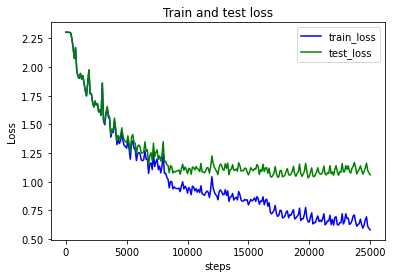

In [10]:
train_index = evaluation_history_TRAIN[:,0]
train_losses = evaluation_history_TRAIN[:,1]
test_losses = evaluation_history_TEST[:,1]

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(train_index,train_losses,'b-',label='train_loss')
ax.plot(train_index,test_losses,'g-',label='test_loss')


#plt.ylim([0.5,1.5])
ax.legend()
plt.xlabel('steps')
plt.ylabel('Loss')
plt.title('Train and test loss')

#### Eigenvalues of Hessian Matrix

We observe that the  majority of the eigenvalues are close to 0 with only a few eigenvalues having positive and negative values.

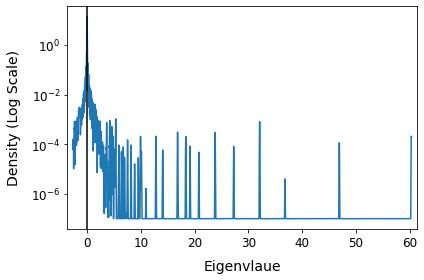

In [22]:
# check the Hessian
density_eigen, density_weight = torch.load(save_dir + '/eigenvalues_step20000.pyT')
from density_plot import get_esd_plot # ESD plot
get_esd_plot(density_eigen, density_weight)
plt.axvline(0,c='k')
# plt.savefig('eigenvalue_alexnet32.svg')
plt.show()